In [4]:
# file with plotting functions
include("utils.jl");

## Examples and definitions in the context of linear systems (but useful for nonlinear ones)
Strogatz explains the concept of the <font color="red">**phase space**</font> by starting from linear two dimensional systems. As e.g. the [*simple harmonic oscillator*](https://en.wikipedia.org/wiki/Simple_harmonic_motion), which is characterized by a linear second order differential equation:
$$ \ddot{x} + \omega^2 x = 0$$
with $\omega^2 = \frac{k}{m}$, where $k$ is the spring constant and $m$ the mass. $x$ is the displacement from the equilibrium position. This second order equation can be brought in first order form by defining $\dot{x} = v$:
\begin{align*}
    & \dot{x} = v \\
    & \dot{v} = - \frac{k}{m} x 
\end{align*}
A vector $(\dot{x},\dot{v})= (v,-\omega^2 x)$  is now assigned to each point $(x,v)$. Hence, the system represents a two-dimensional <font color="red">**vector field**</font>, as shown in the figure below. 


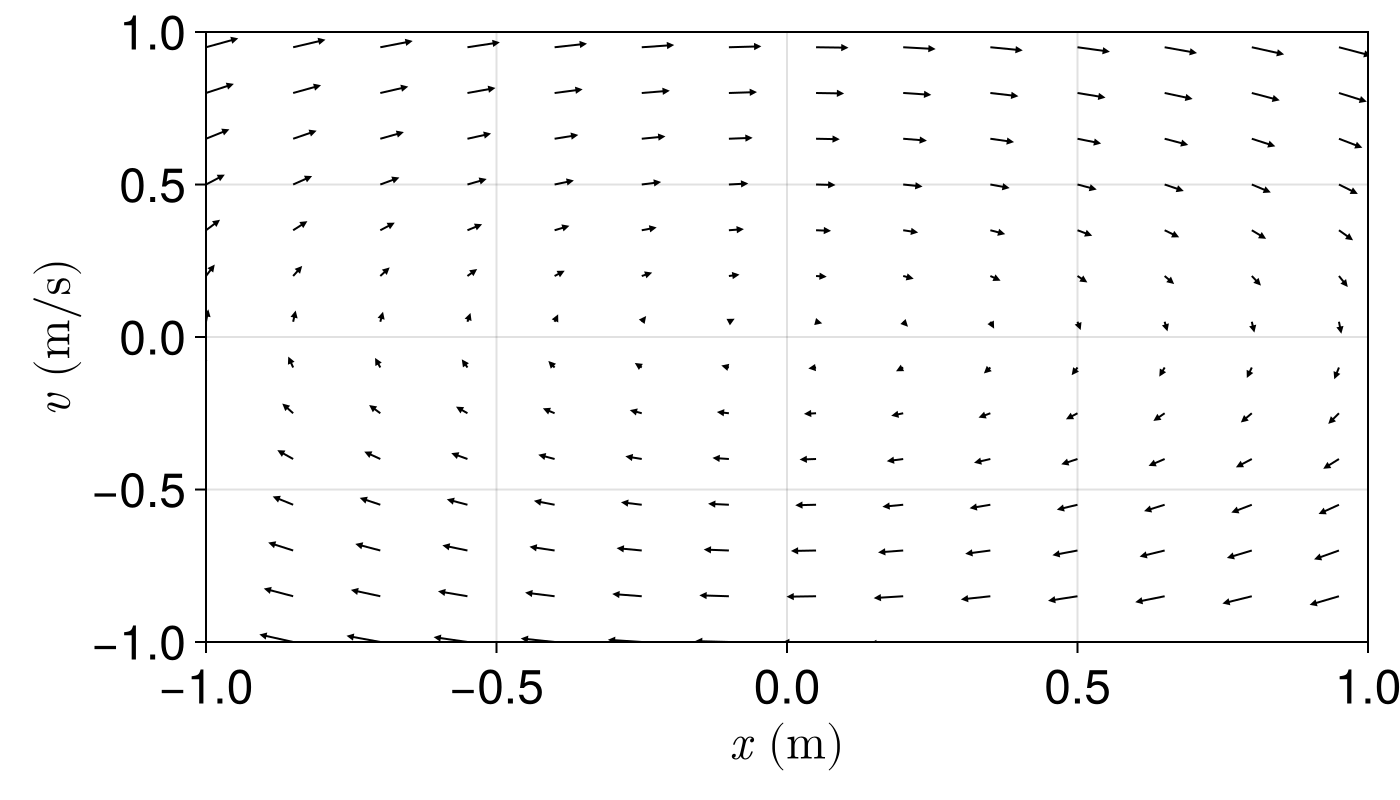

In [15]:
linear_harmonic_oscillator_vector_field(;xlims=(-1,1),ylims=(-1,1),xh=0.15, yh=0.15, k = 0.5, m = 1)

It can be imagined as a fluid field, with local velocity $(\dot{x},\dot{v}) = (v,-\omega^2 x)$. The trajectory of an imaginary particle we place in the field starts at the point $(x_0, v_0)$ (the initial condition) and then follows the flow indicated by the vector field. Such an a imaginary particle is also called <font color="red">**phase point**</font>.

The origin is a special point. A phase point placed there would remain motionless, as $(\dot{x},\dot{v})=0$ when $(x,v)=0$. The origin is a so-called <font color="red">**fixed point**</font>.

A phase point starting anywhere else, would circulate aroung the origin and pass again through its starting point. Such a trajectory, where a phase point passes again through the starting point, forms a <font color="red">**closed orbit**</font>. 

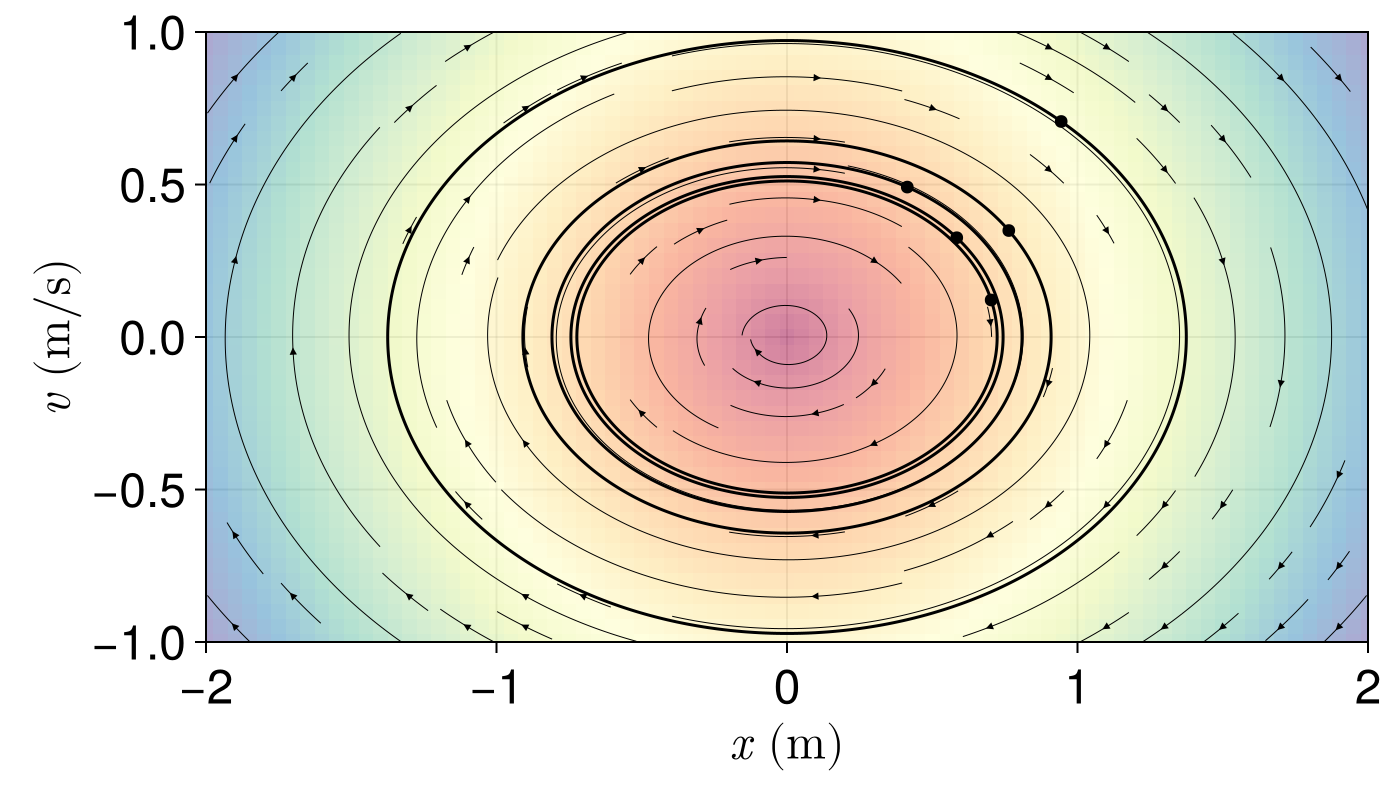

In [4]:
linear_harmonic_oscillator_phase_portrait(;num_traj=5, tf=10, h=0.01,xlims=(-2,2),ylims=(-1,1),xh=0.05, yh=0.05)

Here we can see a picture of some trajectories with random initial condition (black dot), all forming closed orbits. This kind of plot, showing one or more trajectories in the phase space, is called <font color="red">**phase portrait**</font>.

What does the concept of fixed points and closed orbits further tell us ?

- At the fixed point $(x,v)=0 $, the system is in a <font color="red">*static equilibrium*</font> . This means the mass will remain there forever because the forces are balanced.
- The periodic orbits correspond to periodic motions, in this case the oscillation of the mass (up and down) 


More types of fixed points are explained by means of the <font color="red">**uncoupled**</font> linear system
\begin{equation*}
    \begin{bmatrix}
        \dot{x}\\
        \dot{y}\\
    \end{bmatrix}
    = 
    \begin{bmatrix}
        a & 0\\
        0 & -1\\
    \end{bmatrix}
    \begin{bmatrix}
        x\\
        y\\
    \end{bmatrix}
\end{equation*} 

Peforming the matrix multiplication and solving the decoupled equations by direct integration leads to:

\begin{align*}
    & x(t) = x_0 e^{at} \\ 
    & y(t) = y_0 e^{-t} \\ 
\end{align*}

From these equations we can see, that $y(t)$ always decays exponentially, while the decay of $x(t)$ depends on the factor $a$. Below the the phase plots for differents values of $a$ are depicted, with the vertical and horizontal axis representing $y(t)$ and $x(t)$, respectively.

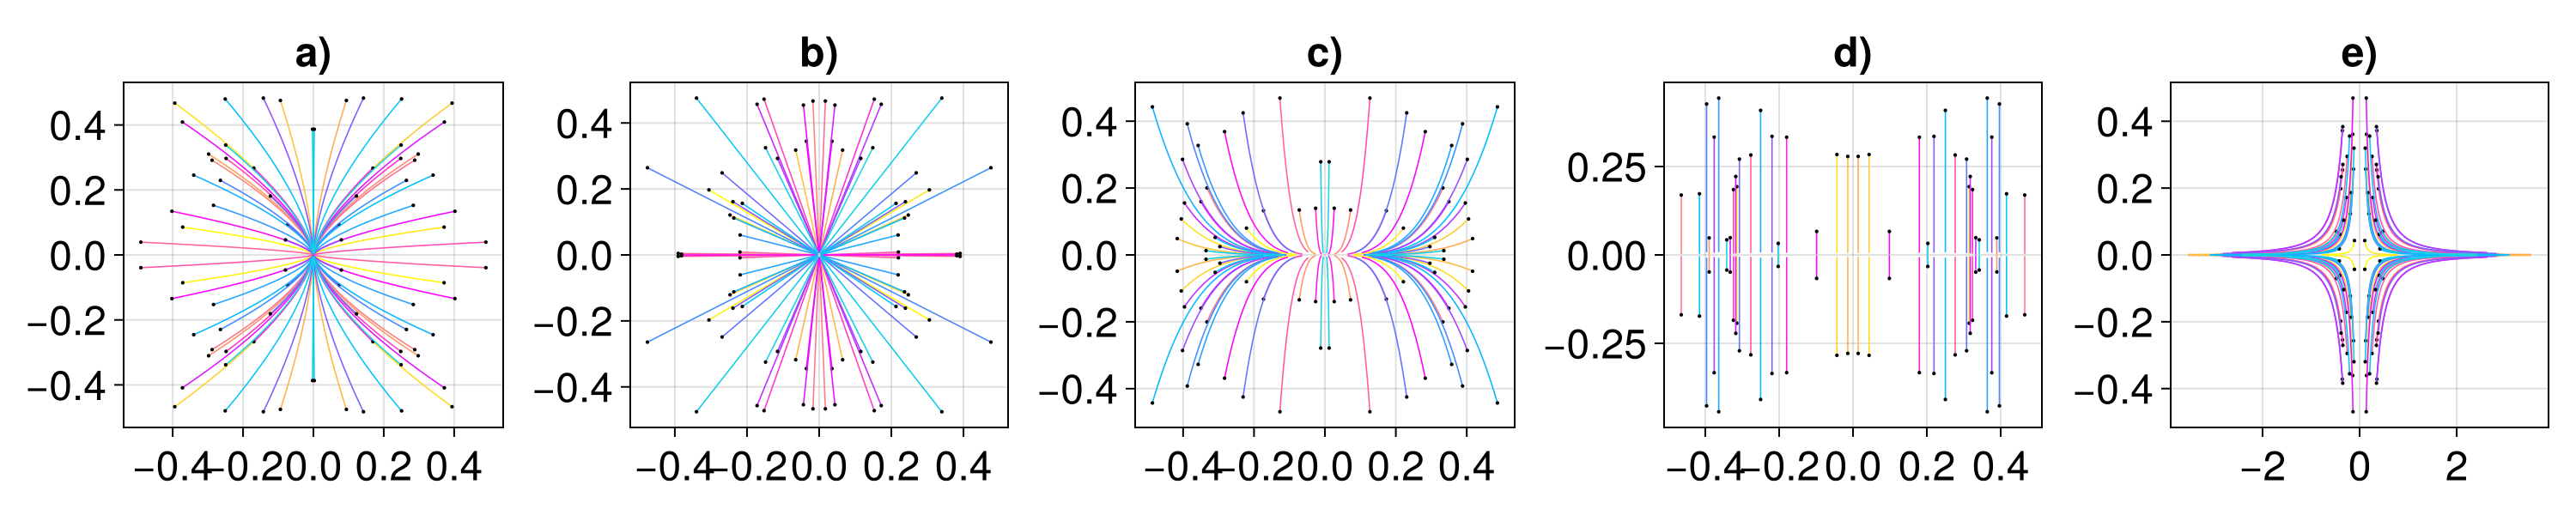

In [20]:
uncoupled_linear_system_phase_portraits(;a = [-1.5, -1, -0.25, 0, 0.5], tr = 0:0.01:4, titles = ["a)","b)","c)","d)","e)"])

The initial condition for each trajectory is depicted by a little dot. This makes it possible to see where all trajectories end.

- a) $a<-1$. The fixed point $\mathbf{x^\star} = \mathbf{0}$ is a <font color="red">**stable node**</font>
. Trajectories approach the stable node tangent to the *slower*  y-direction. 

- b) $a=-1$. $\mathbf{x^\star}$ is called symmetrical node or **star**. The decay rate in x-direction and y-direction are equal.

- c) $-1<a<0$. The fixed point $\mathbf{x^\star}$ the same as in a) but here the *slower* direction is the x-direction. 
  
- d) $a=0$ makes a dramatic change. With this parameter setting, the first equation becomes $x(t)=x_0$ so each trajectory evolves parallel to the y-axis. There is a **line of fixed points** along the x-axis.

- e) When $a>0$, $\mathbf{x^\star} = \mathbf{0}$ becomes unstable, as most trajectories grow exponentially in x-direction. Almost all trajectories diverge from $\mathbf{x^\star}$ and go to infinity. An exemption is a trajectory that starts on the y-axis. It will converge towards the origin. When going forward in time, trajectories are asymptotic to the x-axis. $\mathbf{x^\star} = \mathbf{0}$ is a <font color="red">**saddle point**</font>. The y-axis is the <font color="red">**stable manifold**</font> of the saddle point $\mathbf{x^\star}$. Per definition, a stable manifold is the set of intial conditons, s.t. $\mathbf{x}(t) \rightarrow \mathbf{x^\star}$ when $t \rightarrow \infty$. In backward time, the trajectories become asymptotic to the x-axis. Here the x-axis becomes per definition the <font color="red">**unstable manifold**</font> as trajectories with $x_0$ on the x-axis converge towards the origin ($\mathbf{x}(t) \rightarrow \mathbf{x^\star}$ when $t \rightarrow -\infty$)   

### Types of stability 
This section will introduce some of the language that is used in the context of stability of different type fixed points. It will be useful for analyzing fixed points of *nonlinear systems* (for now we are still looking at linear systems).

Going back to the previous graphic, we can identify $\mathbf{x^\star} = \mathbf{0}$ as an <font color="red">**attracting**</font> fixed point in the phase plots a)-c), as all trajectories starting close to $\mathbf{x^\star}$ converge to it when $t \rightarrow \infty$ (i.e. $\mathbf{x}(t) \rightarrow \mathbf{x^\star}$ as $t \rightarrow \infty$).
In fact, all trajectories converge to $\mathbf{x^\star}$, regardless from which point they start in the phase plane, hence it can be also called <font color="red">**global attractor**</font>. 

A <font color="red">**Lyapunov stable**</font> fixed point ensures that trajectories starting close to it, will remain close to it, regardless of $t \rightarrow \infty$ or $t \rightarrow -\infty$, for *all times*. For a)-d) the origin is Lyapunov stable.

Plot d) is an example of a Lyapunov stable fixed point, which is *not attracting*. This is also termed <font color="red">**neutrally stable**</font>. Close trajectories ar neither neither attracted nor repelled. Another neutrally stable fixed point is the origin in the phase plot of the *harmonic oscillator* (second plot from above). <ins>Often this behaviour emerges in mechanical systems in the absence of friction</ins>.  The opposite scenario is also possible (attracting but no Lyapunov stability).

If a point is Lyapunov stable **and** attracting, it is called <font color="red">**stable**</font> or <font color="red">**asymptotically stable**</font>. If its neither attracting nor lyapunov stable, a fixed point is <font color="red">**unstable**</font>, as the origin in plot d).

## The phase plane and two dimensional *nonlinear* systems
With all these definitions at hand, we can now start the analysis of nonlinear systems, including their fixed points and topological tools for analyzing phase portraits. Analytical solutions are generally not feasible but the qualitative analysis of the phase plane can offer valuable insights. Solutions can be approximated by means of numerical methods, such as fourth-order Runge Kutta integration. 

Instead of using arrows for depicting the vector field represented by a differential equation, it can be clearer to use a plot of the <font color="red">**direction field**</font>, as shown below for the system $\dot{x}_1 + x + e^{-x_2} \;, \; \dot{x}_2 = -x_2$:

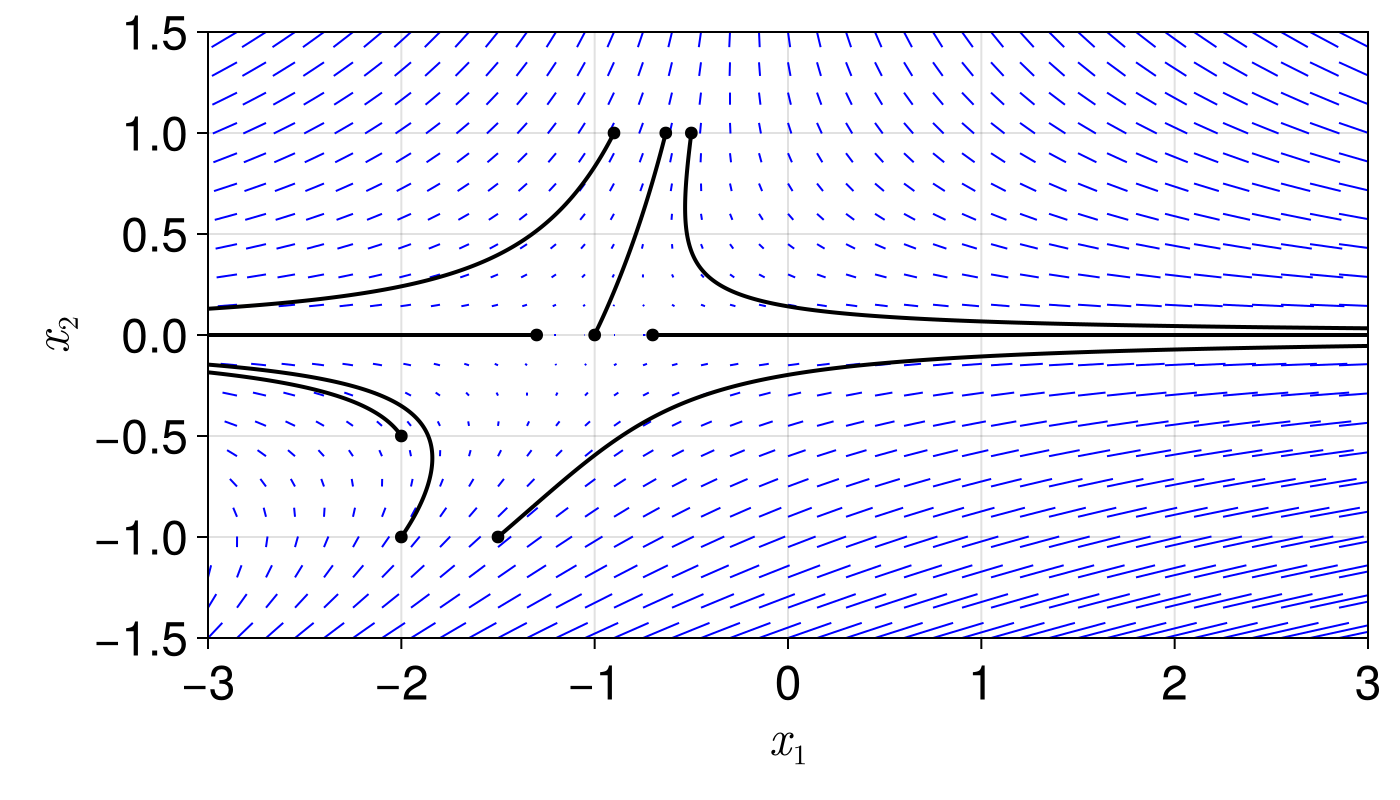

In [5]:
nonlinear_system_direction_field(initial_conditions = [-0.5,1, -0.9,1,-2,-1, -2,-0.5 ,-1,0 ,-1.3,0 ,-0.7,0 ,-0.63215,1, -1.5,-1], h = 0.01, tf = 6, xlims=(-3,3),ylims=(-1.5,1.5),xh=0.15, yh=0.15)

The bold black lines represent numerical solutions the initial conditions denoted by the black dots, while the blue line segments are in fact the direction field. Visibly the trajectories follow local slopes depicted by the lines. 



The **existence and uniqueness theorem** tells us, that the existence and uniqueness of a solution is guaranteed, as long as $\mathbf{f}(\mathbf{x})$ is continuously differentiable (no mathematical definition of the theorem here). This theorem has one important implication:
- two (or more) different trajectories can not intersect.

Otherwise, from the crossing point as initial condition, two different trajectories (i.e. two solutions) would emerge. This is the reason the phase plots look always neat. From this observation other important implications follow:
- if there is a closed orbit $C$ in the phase plane, a trajectory $\mathbf{x}(t)$ with $\mathbf{x}_0$ inside $C$ has to remain within the closed, bounded region. 
- if additionally there are fixed points within $C$, $\mathbf{x}(t)$ might approach the fixed points.
- if there is no fixed points, $\mathbf{x}(t)$ must approach a closed orbit. This is the <font color="red">**Pointcaré-Bendixson theorem**</font> for vector fields on the plane.  

### Linearization around a fixed point

<font color="red">**Linearization**</font> is done as usual by a <font color="red">**Taylor approximation**</font>:

We linearize the system

\begin{equation*}
    \dot{x} = f(x,y), \quad \dot{y} = g(x,y)
\end{equation*} 

around the fixed point $(x^\star, y^\star)$ 

\begin{equation*}
    f(x) =  f(x^\star,y^\star)  + \frac{\partial f}{\partial x}(x - x^\star)  + \frac{\partial f}{\partial y}(y - y^\star) + O((x - x^\star)^2, (y - y^\star)^2,(y - y^\star)(x - x^\star))
\end{equation*} 
since it is a fixed point $f(x^\ast,y^\ast)=0$ and $(x - x^\ast)$ and $(y - y^\ast)$ are very small, we can disregard $f(x^\star,y^\star)$ and the quadratic terms $O$. Doing the same for $g(x,y)$ we finally arrive at

\begin{align*}
    & f(x,y) =  \frac{\partial f}{\partial x}(x - x^\ast)  + \frac{\partial f}{\partial y}(y - y^\ast) \\
    & g(x,y) =  \frac{\partial g}{\partial x}(x - x^\ast)  + \frac{\partial g}{\partial y}(y - y^\ast) \\
\end{align*}

If we linearize the system around a fixed point, neglecting the quadratic rest from the Taylor expansion, the linearized system will predict the correct type of fixed point, as long as its a **saddle**, **node**, or **spiral**. Other cases like <font color="red">**centers**</font> may require some adapted techniques, which can be taken from the book. 

When not interested in the geometry of trajectories but only in stability properties, fixed points can be characterized as:

**Robust cases**:
- *Repellers*/ *sources*: For both eigenvalues $Re(\lambda_i)>0$ 
- *Attractors*/ *sinks*: For both eigenvalues $Re(\lambda_i)<0$ 
- *Saddles*: One eigenvalues $Re(\lambda_1)<0$, other eigenvalues $Re(\lambda_2)>0$ 

**Marginal cases**:
- *Centers*: Both eigenvalues $Re(\lambda_i)=0$ (purely imaginary) (see phase portrait of the simple harmonic oscillator)
- *Higher-order* and *non-isolated fixed points*: At least one eigenvalues $Re(\lambda_i)=0$ 

If $Re(\lambda_i) \neq 0$ for both eigenvalues, the fixed point is also called <font color="red">**hyperbolic**</font>. At this kind of fixed point, the stability is unaffected by small nonlinear terms. In other words, the stability is accurately predicted by the linearization. This can be generalized to n-th order systems:  
- If all the eigenvalues of the linarized system (at the fixed point) lie off the imaginary axis (i.e. $Re(\lambda_i) \neq 0 $ for $i = 1,\dots,n$), the fixed point is **hyperbolic**.

The preservation of the stability property is substantiated by the <font color="red">**Hartman-Grobman theorem**</font>, which reveals that a local phase portrait, near a hyperbolic fixed point is <font color="red">**topologically equivalent**</font> to the phase portrait of the linearization. Topologically equivalent means there is a <font color="red">**homeomorphism**</font> (continuous deformation with continuous inverse), mapping the local phase portrait onto the phase portrait of the linearization. This implies that proportions between trajectories and their direction (sense of time) is preseved.


### (Energy) conservative systems

Many important mechanical second order systems come from Newton's law $F=ma$. One example is a particle of mass $m$ moving in x-direction:
\begin{equation*}
    m \ddot{x} = F(x)
\end{equation*}
where $F(x)$ is some nonlinear force. We assume $F$ is not dependent on $\dot{x}$, which means there is no damping or friction involved. The force is also not dependent on $t$ (i.e. time-independent). In this case it can be shown that the system is <font color="red">*energy conservative*</font>. The Force is defined as $F(x)=-dV/dx$, where $V(x)$ is the <font color="red">**potential energy**</font>. The equation of motion can thus be written as
\begin{equation*}
    m \ddot{x}  + \frac{dV}{dx} = 0
\end{equation*}
Multiplying the equation by $\dot{x}$ and applying the chain rule in reverse, reveals there is a quantity that stays constant over time:
\begin{equation*}
    m \dot{x} \ddot{x}  + \frac{dV}{dx}\dot{x} = 0 \implies 
    \frac{d}{dt}
    \begin{bmatrix}
        \frac{1}{2} m\dot{x}^2 + V(x)\\
    \end{bmatrix}
\end{equation*}
The system <font color="red">*total energy*</font> 
\begin{equation*}
    E = \frac{1}{2} m\dot{x}^2 + V(x)
\end{equation*}
is, for any given solution $x(t)$, constant w.r.t. time. Systems that are governed by such a conserved quantity are <font color="red">**conservative systems**</font>. In more general words, given a system $\mathbf{\dot{x}} = \mathbf{f}(\mathbf{x})$, the real-valued and continuous function $E(x)$ is a <font color="red">**conserved quantity**</font>, if it is constant on trajectories (i.e. $dE/dt = 0$). To prevent someone from finding a function like $E(x) \equiv 0$ for every system (every system would accordingly be conservative), a second requirement for $E(x)$ is to be *nonconstant* on every open set, which defines a region in space.     

We can show, using above defintion, that <ins>a conservative system cannot have any attracting fixed points</ins>. To this end, shortly the term <font color="red">**basin of attraction**</font> is explained:
- given an attracting fixed point $\mathbf{\dot{x}}$, we can define its **basin of attraction** a the set of initial conditions $\mathbf{x}_0$ sucht that $\mathbf{x}(t) \rightarrow \mathbf{x}^\star$ when $t \rightarrow \infty$.
- a basin of attraction can be separated from other basins of attraction by a <font color="red">**basin boundary**</font>. The latter can be a **stable manifold** (explained in first section) leading to some saddle point
- if the **basin boundary** consists of more segments/ trajectories, these are commonly called  <font color="red">**separatrices**</font>.
- basins and their boundaries partition the phase space into regions where trajectories exhibit different long-term behaviour and are therefore important. 

With this definition at hand, we can say that, supposed there is an attracting fixed point $\mathbf{x}^\star$, all the points in the corresponding basin of attraction would have to be at the same energy level as $E(\mathbf{x}^\star)$. So, $E(\mathbf{x})$ must be a constant function for every $\mathbf{x}$ in the basin. But at the same time, there is the requirement for the conserved quantity to be nonconstant over all open sets (basin of attraction is an open set), so these things contradict each other.

Instead of attracting fixed points, one generally finds saddles and centers in conservative systems. One such example is a particle (mass $m=1$) in a double-well potential $V(x) = - \frac{1}{2}x^2 + \frac{1}{4}x^4$. Follwing the procedure in the above example, the force is $-dV/dx=x-x^3$ and accordingly the equation of motion is 

\begin{equation*}
    \ddot{x}  = x - x^3
\end{equation*}
Which can be brought in first order form by doing a substitution 

\begin{align*}
& \dot{x} = y\\
& \dot{y} = x-x^3\\
\end{align*}

From this representation we can determine the fixed points, which are a **saddle** in the origin and two **centers** at ($\pm 1,0$). This can be deduced from the eigenvalues of the linearization at these points and the above classification scheme. This can also be recognized from the streamline plot of the phase plane in b) below.

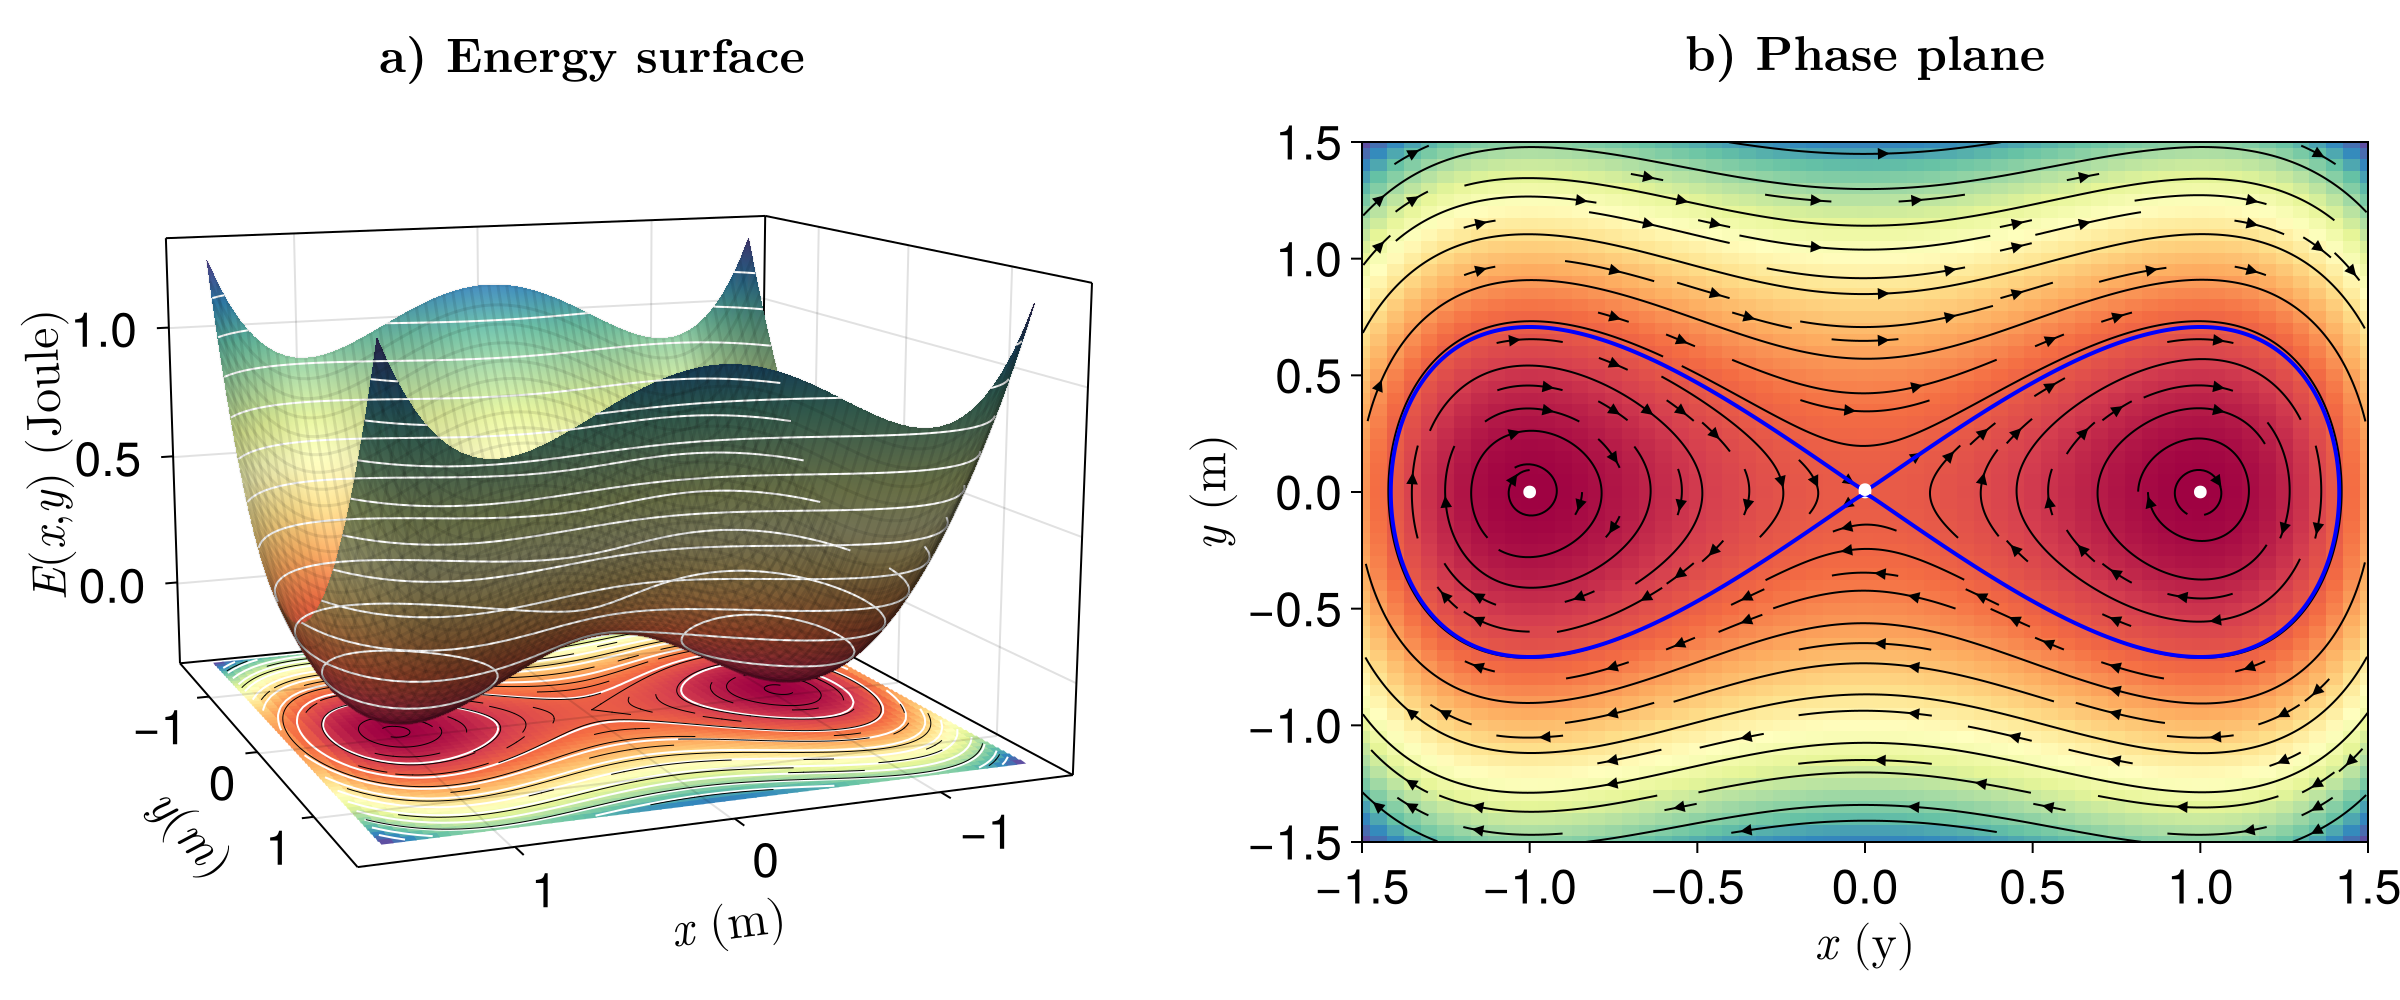

In [17]:
energy_function_and_phase_plane_double_well(;initial_conditions = [0,0.01, -1,0.0, 1,0], h = 0.01, tf = 30, xlims=(-1.5,1.5),ylims=(-1.5,1.5),xh=0.05, yh=0.05)

In a) the <font color="red">**energy surface**</font> of the system is depicted, deduced from the according energy function 
\begin{equation*}
    E = \frac{1}{2}y^2 - \frac{1}{2}x^2 + \frac{1}{4}x^4
\end{equation*}
It can be computed as in the previous mass particel example. Interestingly, a trajectory in the phase space can be deduced from the projection of the <font color="red">**contours**</font> of the **energy surface** onto the phase plane. The contours represent levels of constant energy and as the system is energy conservative, a trajectory in the phase plane will always follow the projection of the according contour. 

The indicated trajectory orbits in b) show that almost all solutions are periodic. Excemptions are the equilibrium solutions (white dots) and two special trajectories that seem to start and end at the origin (blue lines). As they start and end at the same fixed point, they are categorized as <font color="red">**homoclinic orbits**</font> (common in conservative systems). These are not periodic, as trajectories are forever trying to approach the origin.

Tipp from Strogatz: 
- It can be helpful to think of the flow as happening on the energy surface rather than in the phase plane. Trajectories would run *around* the surface as they must stay at a constant height E(x,y) - corresponding to the constant energy level. 

### (Time) reversible systems

Mechanical systems of the form $m \ddot{x} = F(x)$ have a <font color="red">**time-reversal symmetry**</font>, which means when replacing $t \rightarrow -t$ the second derivative $\ddot{x}$ remains unchanged. Only the velocity $\dot{x}$ changes sign. In the phase plane this corresponds to a reflection of the trajectory on the x-axis and a reversal of the flow direction.   

### The simple Pendulum
We depart from the equation of motion for a simple pendulum
\begin{equation*}
    \frac{d^2 \theta}{dt^2} + \frac{g}{L} sin(\theta) = 0 
\end{equation*}
here $g$ is the gravity, $L$ the link lenght and $\theta$ the angle. 
To simplify things we further assume $\frac{g}{L}=1$ and obtain
\begin{equation*}
    \ddot{\theta} + sin(\theta) = 0 
\end{equation*}
The system is reversible and also we can find a conservatived quantity $E$ by multiplying with $\dot{\theta}$ and applying the chain rule in reverse:
\begin{equation*}
    \frac{d}{dt}
    \begin{bmatrix}
    \frac{1}{2}\dot{\theta}^2 - cos(\theta)
    \end{bmatrix} 
    = \frac{d}{dt} E(\theta, \dot{\theta}) = 0 
\end{equation*}

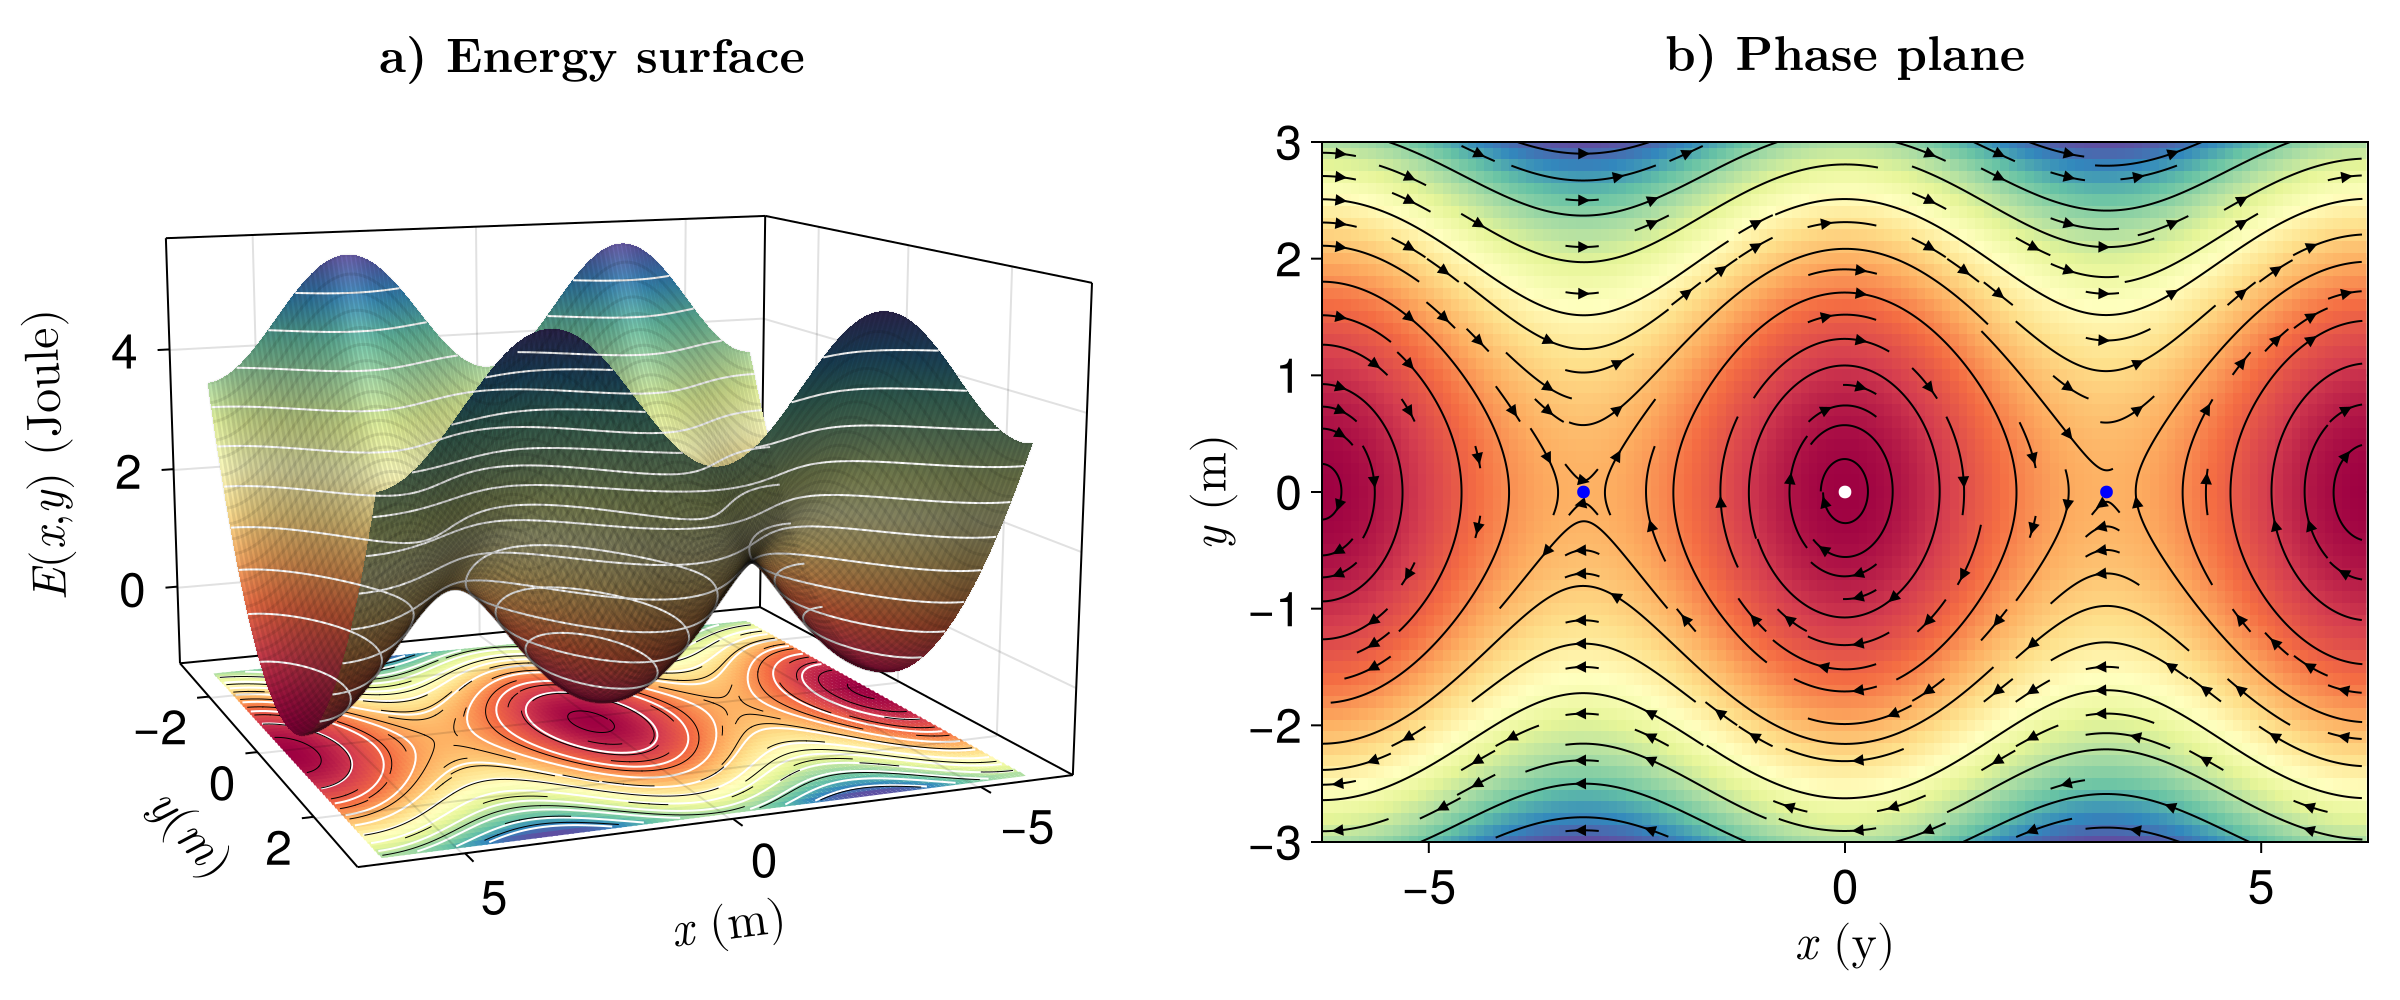

In [18]:
energy_function_and_phase_plane_single_pendulum(;initial_conditions = [0,0.01, -1,0.0, 1,0], h = 0.01, tf = 30, xlims=(-2π,2π),ylims=(-3,3),xh=0.1, yh=0.1)

The left hand side a) shows the energy surface and the projection of its contours onto the phase plane which is obtained, as in the previous examples, by performing a substitution
\begin{equation*}
    \dot{\theta} = v \text{,} \quad \dot{v} = - sin(\theta)
\end{equation*}
One can recognize in b) a saddle point (blue dots) and a center at the origin (white dot). The center corresponds to the lowest possible energy state ($E=-1$), it is a neutrally stable equilibrium. The small orbits around it correspond to small oscillations around the equilibrium point, these are called <font color="red">**liberations**</font>. 